In [454]:
import pandas as pd
import numpy as np

In [455]:
df = pd.read_csv('../data/screenings.csv')
movies = pd.read_csv('../data/movie_info.csv')
theaters = pd.read_csv('../data/theater_info.csv')

df = df.merge(movies, on=['movie', 'year']).merge(theaters, on='theater')
del movies, theaters

In [456]:
df['decade'] = ((df['year']/10).astype(int)*10).astype(str)+'s'

In [457]:
arrdt = pd.DataFrame(df['zipcode'].value_counts()).reset_index()
arrdt = arrdt.rename(columns={'zipcode':'nb_seances', 'index':'zipcode'})
arrdt = pd.concat([arrdt, 
                   pd.DataFrame({'zipcode':[75007], 'nb_seances':[0]})]).reset_index(drop=True)
arrdt = arrdt[arrdt['zipcode'].astype(str).str[:2]=='75'].sort_values('zipcode').reset_index(drop=True)

# Par arrondissement

### Réalisateur x Arrdt

In [458]:
zips = []
director, freq = {}, {}
for x in np.arange(1, 4):
    director[x], freq[x] = [], []
for zipcode in df['zipcode'].unique():
    zips.append(zipcode)
    for x in np.arange(1, 4):
        director[x].append(df[df['zipcode']==zipcode]['directors'].value_counts().keys()[x-1])
        freq[x].append(df[df['zipcode']==zipcode]['directors'].value_counts()[x-1])

In [459]:
temp =  pd.DataFrame({'zipcode':zips, 
                      '#1':director[1], 'freq1':freq[1], 
                      '#2':director[2], 'freq2':freq[2], 
                      '#3':director[3], 'freq3':freq[3]}).sort_values('zipcode').reset_index(drop=True)
arrdt = arrdt.merge(temp[['zipcode', '#1']].rename(columns={'#1':'director'}), on='zipcode', how='left')

In [460]:
df[df['zipcode']==75009]['theater_name'].value_counts()

Max Linder Panorama    150
UGC Opéra               43
Les Cinq Caumartin       2
Name: theater_name, dtype: int64

In [461]:
temp[temp['zipcode']/1000<76]

,zipcode,#1,freq1,#2,freq2,#3,freq3
0,75001,Jean Eustache,76,"Koji Morimoto, Tensai Okamura, Katsuhiro Ôtomo",76,"Alan Mak, Andrew Lau",70
1,75002,James Cameron,43,Phyllida Lloyd,13,Peter Jackson,9
2,75003,Pier Paolo Pasolini,301,Wong Kar-Wai,122,Akira Kurosawa,121
3,75004,Denis Gheerbrant,42,Marc Isaacs,24,Vicente Aranda,19
4,75005,Pier Paolo Pasolini,430,Wong Kar-Wai,307,Jean-Luc Godard,284
5,75006,Bette Gordon,239,Stanley Kubrick,224,David Lynch,165
6,75008,James Cameron,48,Akira Kurosawa,26,Luis Buñuel,24
7,75009,Sergio Corbucci,36,Jean-Pierre Mocky,23,James Gray,19
8,75010,Kinuyo Tanaka,128,Mikio Naruse,62,Pier Paolo Pasolini,59
9,75011,Kinuyo Tanaka,147,François Truffaut,108,Jean Eustache,74


### Décennie x Arrdt

In [462]:
zips, decade = [], []

for zipcode in df['zipcode'].unique():
    zips.append(zipcode)
    decade.append(df[df['zipcode']==zipcode]['decade'].value_counts().keys()[0])

In [463]:
arrdt = arrdt.merge(pd.DataFrame({'zipcode':zips, 'decade':decade}), on='zipcode', how='left')

# Horaire dans la journée

In [464]:
df[df['title']=='The Rocky Horror Picture Show']['theater_name'].value_counts()

Studio Galande    82
Reflet Medicis     1
Name: theater_name, dtype: int64

In [465]:
print(df[df['showtime']<13].shape)
print(df[(df['showtime']>=13)&(df['showtime']<16)].shape)
print(df[(df['showtime']>=16)&(df['showtime']<19)].shape)
print(df[(df['showtime']>=19)&(df['showtime']<21)].shape)
print(df[(df['showtime']>=21)].shape)

(4459, 13)
(8825, 13)
(8087, 13)
(6367, 13)
(4010, 13)


In [466]:
df.loc[df['showtime']<13, 'tranche_horaire'] = 'Avant 13h'
df.loc[(df['showtime']>=13)&(df['showtime']<16), 'tranche_horaire'] = 'De 13 à 16h'
df.loc[(df['showtime']>=16)&(df['showtime']<19), 'tranche_horaire'] = 'De 16 à 19h'
df.loc[(df['showtime']>=19)&(df['showtime']<21), 'tranche_horaire'] = 'De 19 à 21h'
df.loc[(df['showtime']>=21), 'tranche_horaire'] = 'Après 21h'
tranches = ['Avant 13h', 'De 13 à 16h', 'De 16 à 19h', 'De 19 à 21h', 'Après 21h']

In [467]:
director, director_count, title, title_count = [], [], [], []
for elem in tranches:
    director.append(df[df['tranche_horaire']==elem]['directors'].value_counts().keys()[0])
    director_count.append(df[df['tranche_horaire']==elem]['directors'].value_counts()[0])
    title.append(df[df['tranche_horaire']==elem]['title'].value_counts().keys()[0])
    title_count.append(df[df['tranche_horaire']==elem]['title'].value_counts()[0])

In [468]:
pd.DataFrame({'tranche_horaire':tranches, 'director':director, 'director_count':director_count, 
              'title':title, 'title_count':title_count})

,tranche_horaire,director,director_count,title,title_count
0,Avant 13h,Pier Paolo Pasolini,238,Avatar,162
1,De 13 à 16h,Pier Paolo Pasolini,287,Avatar,244
2,De 16 à 19h,James Cameron,264,Avatar,264
3,De 19 à 21h,James Cameron,225,Avatar,225
4,Après 21h,David Lynch,210,The Rocky Horror Picture Show,83


In [469]:
df['hour'] = df['showtime'].astype(int)

In [470]:
temp_l = []
for x in df['hour'].unique():
    temp_l.append(df[df['hour']==x]['directors'].value_counts().keys()[0])
pd.DataFrame({'hour':df['hour'].unique(), 'director':temp_l}).sort_values('hour').reset_index(drop=True)

,hour,director
0,0,Wong Kar-Wai
1,1,"Joel Coen, Ethan Coen"
2,2,Wong Kar-Wai
3,3,Wong Kar-Wai
4,4,Jim Jarmusch
5,5,Bong Joon Ho
6,9,Wong Kar-Wai
7,10,James Cameron
8,11,Pier Paolo Pasolini
9,12,Pier Paolo Pasolini


In [471]:
temp_l = []
for x in df['hour'].unique():
    temp_l.append(df[df['hour']==x]['year'].mean().round(0))
temp = pd.DataFrame({'hour':df['hour'].unique(), 'avg_year':temp_l}).sort_values('hour').reset_index(drop=True)

In [472]:
temp

,hour,avg_year
0,0,1995.0
1,1,2008.0
2,2,1985.0
3,3,2001.0
4,4,1992.0
5,5,2003.0
6,9,1994.0
7,10,1996.0
8,11,1983.0
9,12,1979.0


## Arrondissement map

In [473]:
import json
import geojson
import plotly
import plotly.express as px
from urllib.request import urlopen
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

In [474]:
borders_arrdt = gpd.read_file('https://opendata.paris.fr/api/explore/v2.1/catalog/'
                              'datasets/arrondissements/exports/geojson?lang=fr&timezone=Europe%2FBerlin')

In [475]:
arrdt['c_arinsee'] = arrdt['zipcode']
arrdt['c_arinsee'] = (arrdt['c_arinsee'].astype(str).str[:2]+'1'+arrdt['c_arinsee'].astype(str).str[-2:]).astype(int)

In [476]:
borders_arrdt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [477]:
data = borders_arrdt.merge(arrdt, on='c_arinsee')

In [481]:
data.loc[data['nb_seances']<100, 'director'] = 'Données insuffisantes'
data.loc[data['decade'].isnull(), 'decade'] = 'Données insuffisantes'

<GeoAxesSubplot: >

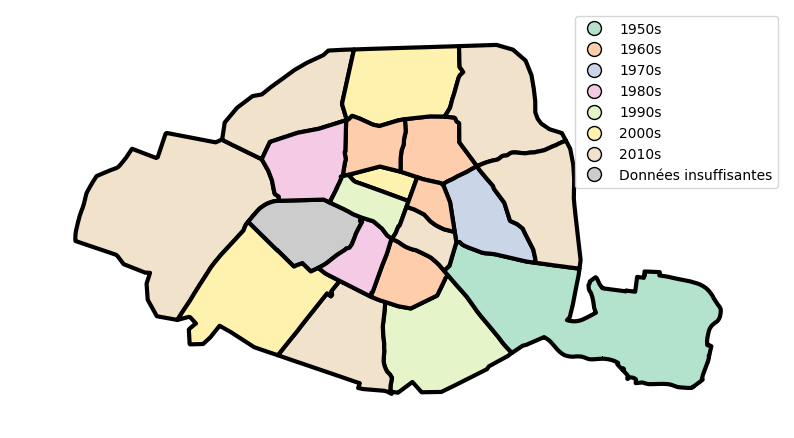

In [482]:
geoplot.choropleth(data, hue = 'decade', projection=gcrs.AlbersEqualArea(), 
                   figsize = (10,10), cmap='Pastel2',  legend=True, 
                   edgecolor='black', linewidth=3)

<GeoAxesSubplot: >

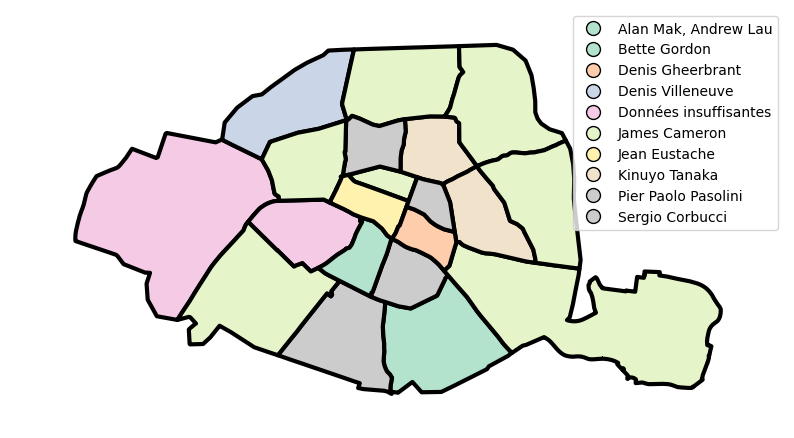

In [432]:
geoplot.choropleth(data, hue = 'director', projection=gcrs.AlbersEqualArea(), 
                   figsize = (10,10), cmap='Pastel2',  legend=True, 
                   edgecolor='black', linewidth=3)

In [453]:
data

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry,zipcode,nb_seances,director,nb_seances_log
0,750000013,13,75113,13ème Ardt,Gobelins,750001537,7.149311e+06,11546.546526,"{'lon': 2.362272440420904, 'lat': 48.828388031...","POLYGON ((2.37491 48.83801, 2.37698 48.83610, ...",75013,3468,"Alan Mak, Andrew Lau",8.151622
1,750000014,14,75114,14ème Ardt,Observatoire,750001537,5.614877e+06,10317.483310,"{'lon': 2.3265420441989484, 'lat': 48.82924450...","POLYGON ((2.33381 48.84061, 2.33673 48.83965, ...",75014,608,Pier Paolo Pasolini,6.411818
2,750000016,16,75116,16ème Ardt,Passy,750001537,1.637254e+07,17416.109657,"{'lon': 2.2619707883645415, 'lat': 48.86039210...","POLYGON ((2.27427 48.87837, 2.27749 48.87796, ...",75016,53,Données insuffisantes,3.988984
3,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"{'lon': 2.3428025468913636, 'lat': 48.86827922...","POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...",75002,124,James Cameron,4.828314
4,750000010,10,75110,10ème Ardt,Entrepôt,750001537,2.891739e+06,6739.375055,"{'lon': 2.360728487847451, 'lat': 48.876130036...","POLYGON ((2.36469 48.88437, 2.36485 48.88436, ...",75010,1772,Kinuyo Tanaka,7.480428
5,750000017,17,75117,17ème Ardt,Batignolles-Monceau,750001537,5.668835e+06,10775.579516,"{'lon': 2.306776990574406, 'lat': 48.887326522...","POLYGON ((2.29517 48.87396, 2.29504 48.87378, ...",75017,430,Denis Villeneuve,6.066108
6,750000007,7,75107,7ème Ardt,Palais-Bourbon,750001537,4.090057e+06,8099.424883,"{'lon': 2.3121876914820114, 'lat': 48.85617442...","POLYGON ((2.32090 48.86306, 2.32094 48.86305, ...",75007,0,Données insuffisantes,0.000000
7,750000018,18,75118,18ème Ardt,Buttes-Montmartre,750001537,5.996051e+06,9916.464176,"{'lon': 2.3481605195620405, 'lat': 48.89256926...","POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...",75018,165,James Cameron,5.111988
8,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"{'lon': 2.3507146095752596, 'lat': 48.84444315...","POLYGON ((2.36443 48.84614, 2.36484 48.84584, ...",75005,13526,Pier Paolo Pasolini,9.512443
9,750000019,19,75119,19ème Ardt,Buttes-Chaumont,750001537,6.792651e+06,11253.182479,"{'lon': 2.384820960152513, 'lat': 48.887075996...","POLYGON ((2.38943 48.90122, 2.39014 48.90108, ...",75019,756,James Cameron,6.629363


In [ ]:
geoplot.choropleth(data, hue = 'director', projection=gcrs.AlbersEqualArea(), 
                   figsize = (10,10), cmap='Pastel2',  legend=True, 
                   edgecolor='black', linewidth=3)

In [441]:
data['nb_seances_log'] = np.log(data['nb_seances']+1)

<GeoAxesSubplot: >

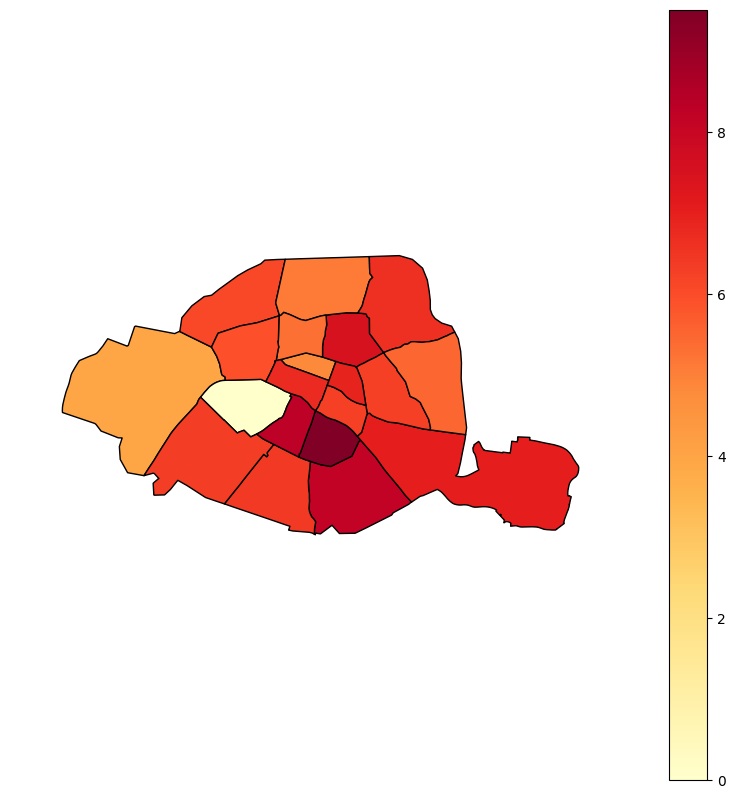

In [452]:
geoplot.choropleth(data, hue = 'nb_seances_log', projection=gcrs.AlbersEqualArea(), 
                   figsize = (10,10), cmap='YlOrRd',  legend=True, 
                   edgecolor='black', linewidth=1)

## Fun stuff

In [91]:
new_df = pd.DataFrame(df.value_counts('zipcode')).rename(columns={0:'nb_de_seances'})

In [92]:
temp = pd.read_csv('../data/demographics/dossier_complet/dossier_complet.csv', sep=';')

/var/folders/mt/hz45vppx28l4p48mcmrgfwmc0000gn/T/ipykernel_16915/281492650.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv('../data/demographics/dossier_complet/dossier_complet.csv', sep=';')


In [93]:
temp = temp[temp['CODGEO'].astype(str).str[:2]=='75'].reset_index(drop=True)

In [94]:
temp['zipcode'] = temp['CODGEO'].astype(str).str[:2]+'0'+temp['CODGEO'].astype(str).str[-2:]

In [95]:
temp['population'] = temp['P19_POP']

In [96]:
temp['pop_above_60'] = temp['P19_POP6074'] + temp['P19_POP7589'] + temp['P19_POP90P']

In [97]:
temp['zipcode'] = temp['zipcode'].astype(int)

In [98]:
new_df = new_df.merge(temp.set_index('zipcode')[['population', 'pop_above_60']], right_index=True, left_index=True)

In [99]:
new_df['seances_per_capita'] = new_df['nb_de_seances']/new_df['population']
new_df['seances_per_10k'] = 10000*new_df['seances_per_capita']
new_df['share_above_60'] = new_df['pop_above_60']/new_df['population']

array([2161.36843732,  916.30895963,  182.88380878,  192.08529929,
         71.8608441 ,  284.20279206,  495.69642521,   40.25507523,
         44.17664759,   24.67735441,   35.81069914,  154.13133775,
         25.51893505,  101.80900294,   11.69266747,   31.81954486,
          8.4169836 ,   57.42069924,    2.96031367])

In [103]:
import matplotlib.pyplot as plt

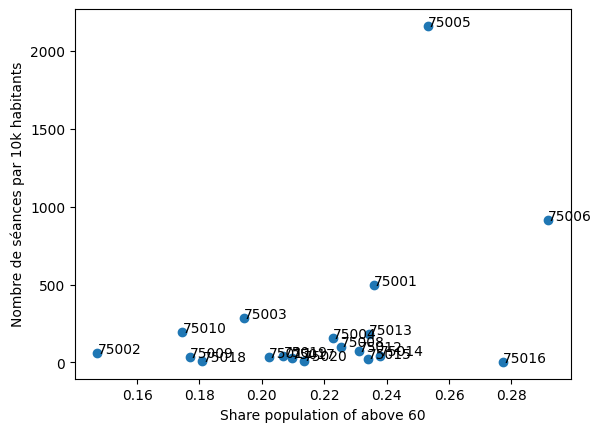

In [117]:
x = new_df['share_above_60'].values
y = new_df['seances_per_10k'].values
n = list(new_df.index)

fig, ax = plt.subplots()
plt.xlabel('Share population of above 60')
plt.ylabel('Nombre de séances par 10k habitants')
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [119]:
meta = pd.read_csv('../data/demographics/dossier_complet/meta_dossier_complet.csv', sep=';')

In [125]:
meta[meta['COD_VAR']!='CODGEO'].sample(20)

,COD_VAR,LIB_VAR,LIB_VAR_LONG,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR,THEME,SOURCE
1686,ETPFZCP20,Postes des Ets actifs construction 100 sal ou ...,Nombre de postes des établissements actifs de ...,NaN,NaN,NUM,4,Caractéristiques des établissements,"Insee, Flores (Fichier LOcalisé des Rémunérati..."
72,C19_F15P_CS4,Pop 15 ans ou plus Femmes Prof. intermédiaires...,Nombre de femmes de 15 ans ou plus Professions...,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2008, RP2013 et RP2019, géographie au..."
109,P13_POP6074,Pop 60-74 ans en 2013 (princ),Nombre de personnes de 60 à 74 ans en 2013,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2008, RP2013 et RP2019, géographie au..."
824,P19_F1517,Femmes 15-17 ans en 2019 (princ),Nombre de femmes de 15 à 17 ans en 2019,NaN,NaN,NUM,17,Diplômes - Formation,"Insee, RP2008, RP2013 et RP2019, géographie au..."
329,P19_POP15P,Pop 15 ans ou plus en 2019 (princ),Nombre de personnes de 15 ans ou plus en 2019,NaN,NaN,NUM,16,Couples - Familles - Ménages,"Insee, RP2008, RP2013 et RP2019, géographie au..."
845,P19_HNSCOL15P_BEPC,"Hommes 15 ans ou plus non scol. BEPC, brevet d...",Nombre de hommes non scolarisées de 15 ans ou ...,NaN,NaN,NUM,17,Diplômes - Formation,"Insee, RP2008, RP2013 et RP2019, géographie au..."
332,P19_POP2539,Pop 25-39 ans en 2019 (princ),Nombre de personnes de 25 à 39 ans en 2019,NaN,NaN,NUM,17,Couples - Familles - Ménages,"Insee, RP2008, RP2013 et RP2019, géographie au..."
279,C08_F15P_CS4,Pop 15 ans ou plus Femmes Prof. intermédiaires...,Nombre de femmes de 15 ans ou plus Professions...,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2008, RP2013 et RP2019, géographie au..."
1503,NAIS9099,Naissances entre 1990 et 1999,Nombre de naissances entre RP1990 et RP1999,NaN,NaN,NUM,16,Évolution et structure de la population,"Insee, RP1967 à 1999 dénombrements, RP2008 au ..."
1013,P19_HSAL1524,Salariés 15-24 ans Hommes en 2019 (princ),Nombre d'hommes salariés de 15 à 24 ans en 2019,NaN,NaN,NUM,17,"Population active, emploi et chômage au sens d...","Insee, RP2008, RP2013 et RP2019, géographie au..."


In [85]:
filmmakers = list(df['directors'].value_counts().keys())

In [86]:
filmmakers

['Pier Paolo Pasolini',
 'James Cameron',
 'Kinuyo Tanaka',
 'Wong Kar-Wai',
 'Akira Kurosawa',
 'François Truffaut',
 'Jean Eustache',
 'David Lynch',
 'Stanley Kubrick',
 'Luis Buñuel',
 'Jean-Luc Godard',
 'Louis Malle',
 'Joseph Losey',
 'Alfred Hitchcock',
 'Bette Gordon',
 'Francis Ford Coppola',
 'Koji Morimoto, Tensai Okamura, Katsuhiro Ôtomo',
 'Brian De Palma',
 'Ettore Scola',
 'Gus Van Sant',
 'Jim Jarmusch',
 'Hayao Miyazaki',
 'Max Ophüls',
 'Harold Ramis',
 'Douglas Sirk',
 'Tetsuya Mariko',
 'Tim Burton',
 'Fritz Lang',
 'Michelangelo Antonioni',
 'Joe Dante',
 'Quentin Tarantino',
 'Vera Chytilova',
 'Francesco Rosi',
 'Eric Rohmer',
 'Roberto Rossellini',
 'Peter Weir',
 'Blake Edwards',
 'Alan Mak, Andrew Lau',
 'Claire Denis',
 'Rainer Werner Fassbinder',
 'Yasuzo Masumura',
 'Ernst Lubitsch',
 'Jacques Doillon',
 'Yimou Zhang',
 'Mike Nichols',
 'Terry Gilliam',
 'Stanley Donen, Gene Kelly',
 'Hou Hsiao-Hsien',
 'Valerio Zurlini',
 'Martin Scorsese',
 'René Clair',

In [ ]:
male = []

In [ ]:
female = []